In [1]:
import pandas as pd
import numpy as np

df = pd.read_json('DubNation_2022_11_03_10ktweet_cleaned.json')
df.head()

,Date,User,Tweet,clean_text
0,2022-11-02 23:57:58,ColdPieceCITY,RT @ColdPieceCITY: Steph = Mount Rushmore ?\n#...,steph mount rushmore
1,2022-11-02 23:56:40,HermanKosta,"RT @warriors: #DubNation, just a reminder that...",reminder text warrior get ready vote
2,2022-11-02 23:56:28,ColdPieceCITY,RT @ColdPieceCITY: - Led Warriors to their fir...,lead warrior first championship year lead warr...
3,2022-11-02 23:55:59,Sethoole,RT @warriors_bra: 🏀 GOLDEN STATE WARRIORS | 20...,golden state warrior
4,2022-11-02 23:54:23,TravelingBeee,RT @TravelingBeee: We ok with Green leaving? #...,ok green leave


In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df["sentiment_score"] = df["clean_text"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentiment"] = np.select([df["sentiment_score"] < 0, df["sentiment_score"] == 0, df["sentiment_score"] > 0],
                           ['negative', 'neutral', 'positive'])

In [3]:
positive = df[df['sentiment'] == 'positive'].shape[0]
negative = df[df['sentiment'] == 'negative'].shape[0]
neutral = df[df['sentiment'] == 'neutral'].shape[0]

print('Pozitív hangulatú mondatok száma: ', positive)
print('Negatív hangulatú mondatok száma: ', negative)
print('Neutrális hangulatú mondatok száma: ', neutral)

Pozitív hangulatú mondatok száma:  3888
Negatív hangulatú mondatok száma:  1399
Neutrális hangulatú mondatok száma:  4713


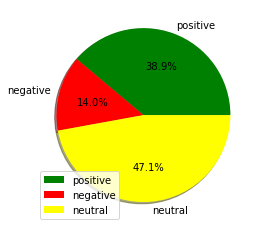

In [4]:
import matplotlib.pyplot as plt

ratings = ['positive', 'negative', 'neutral']
slices = [positive, negative, neutral]
colors = ['green', 'red', 'yellow']

plt.pie(slices, labels=ratings, colors=colors, shadow=True, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

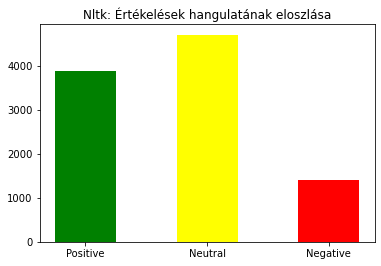

In [5]:
plt.bar([1, 2, 3], [positive, neutral, negative], tick_label = ['Positive', 'Neutral', 'Negative'], width=0.5, color=['green', 'yellow', 'red'])
plt.title('Nltk: Értékelések hangulatának eloszlása')
plt.show()

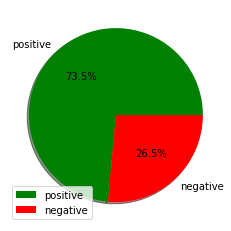

In [6]:
ratings = ['positive', 'negative']
slices = [positive, negative]
colors = ['green', 'red']

plt.pie(slices, labels=ratings, colors=colors, shadow=True, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

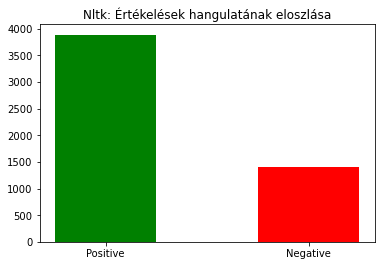

In [7]:
plt.bar([1, 2], [positive, negative], tick_label = ['Positive', 'Negative'], width=0.5, color=['green', 'red'])
plt.title('Nltk: Értékelések hangulatának eloszlása')
plt.show()